In [88]:
import pandas as pd
import string
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("data/df.graph.words-memory.csv").drop(columns=["Unnamed: 0", "in.cs.se", "chosen", "chosen.se"])

In [90]:
df

,word,in.cs
0,ABDOMEN,0.886364
1,ADDICT,0.785714
2,ALMOND,0.840000
3,ANIMAL,0.900000
4,BABOON,0.896552
...,...,...
83,TRIVIA,0.861111
84,TURKEY,0.714286
85,WAFFLE,0.800000
86,WALNUT,0.823529


In [91]:
letter_index = 3
alphabet_list = list(string.ascii_uppercase)
alphabet = pd.DataFrame({"letter": alphabet_list}).astype('string')
alphabet = alphabet.assign(order=alphabet.index+1)

In [92]:
df["letter"] = df["word"].str.get(letter_index-1).astype('string')
df = df.merge(alphabet, on=["letter"]).rename(columns={"order": f"{letter_index}-order", "letter": f"{letter_index}-letter"})
df

,word,in.cs,3-letter,3-order
0,ABDOMEN,0.886364,D,4
1,ADDICT,0.785714,D,4
2,BUDGET,0.833333,D,4
3,KIDNEY,0.846154,D,4
4,ALMOND,0.840000,M,13
...,...,...,...,...
83,MUFFIN,0.904762,F,6
84,WAFFLE,0.800000,F,6
85,JAVELIN,0.875000,V,22
86,LIQUID,0.833333,Q,17


In [93]:
sorted(df[f"{letter_index}-order"].unique())

[1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25]

In [94]:
# Every other letter, can start at X or at Y
alphabet_list[::-2]
alphabet_list[:-1][::-2]

# Prefer to start at Y so that never sure that reached optimum
letters_list = alphabet_list[:-1][::-2]

In [96]:
letters_list

['Y', 'W', 'U', 'S', 'Q', 'O', 'M', 'K', 'I', 'G', 'E', 'C', 'A']

In [97]:
measured_options = df[df[f"{letter_index}-letter"].isin(letters_list)].sort_values(f"{letter_index}-order")
measured_options

,word,in.cs,3-letter,3-order
67,PEACOCK,0.900000,A,1
66,HEAVEN,0.965517,A,1
71,TRAFFIC,0.807692,A,1
70,SPATULA,0.900000,A,1
69,PLANET,0.833333,A,1
63,BEAVER,0.925926,A,1
64,BLANKET,0.733333,A,1
68,PEANUT,0.769231,A,1
65,DRAGON,0.904762,A,1
72,BUCKET,1.000000,C,3


In [98]:
# Missing for letter index 3
# 5 - E
# 23 - W

In [99]:
from english_words import english_words_alpha_set
all_words = pd.DataFrame({"word": list(english_words_alpha_set)})
all_words

,word
0,Thor
1,Fenton
2,stolid
3,squirrel
4,soma
...,...
25469,risen
25470,hamstrung
25471,insufficient
25472,Fermat


In [100]:
missing = "W"
all_words = all_words.assign(letter=all_words["word"].str.get(letter_index-1).str.upper())
possible_words = all_words[(all_words["letter"]==missing)&(~all_words["word"].str.get(0).str.isupper())]

In [101]:
chunk_size = 25
chunk = 8
possible_words.iloc[chunk*chunk_size:(chunk+1)*chunk_size]

,word,letter
24440,lawmake,W
24444,gawk,W
24508,dowel,W
24538,downplay,W
24589,pewter,W
24593,paw,W
24771,pow,W
24917,downhill,W
24961,cowman,W
24984,bowerbird,W


In [102]:
# options for W
## jewel, downfall, towel, sewage, newsletter, coworker, lawsuit, jawbone, coward, powder, 

In [103]:
# options for E
## ocean, poetry, freedom, deer, dream, beeswax, creek, guest, 
# wheat, treadmill, wheel, wrench, cream, duet, shepherd, 
# breakfast, feedback, eyelid, energy

In [104]:
measured_options

,word,in.cs,3-letter,3-order
67,PEACOCK,0.900000,A,1
66,HEAVEN,0.965517,A,1
71,TRAFFIC,0.807692,A,1
70,SPATULA,0.900000,A,1
69,PLANET,0.833333,A,1
63,BEAVER,0.925926,A,1
64,BLANKET,0.733333,A,1
68,PEANUT,0.769231,A,1
65,DRAGON,0.904762,A,1
72,BUCKET,1.000000,C,3


In [105]:
suggested_words_dict = {"Y": "ROYALTY",
                   "W": "POWDER",
                   "U": "CHURCH",
                   "S": "CASINO", 
                   "Q": "LIQUID",
                   "O": "ALMOND",
                   "M": "PUMPKIN",
                   "K": "BAKERY",
                   "I": "CHIMNEY",
                   "G": "MAGNET",
                   "E": "ENERGY",
                   "C": "JACKET",
                   "A": "DRAGON"
                  }
suggested_words = pd.DataFrame({"letter": list(suggested_words_dict.keys()), "word": list(suggested_words_dict.values())})
suggested_words

,letter,word
0,Y,ROYALTY
1,W,POWDER
2,U,CHURCH
3,S,CASINO
4,Q,LIQUID
5,O,ALMOND
6,M,PUMPKIN
7,K,BAKERY
8,I,CHIMNEY
9,G,MAGNET


In [106]:
df_suggested_words = df[df["word"].isin(suggested_words["word"])]
df_suggested_words

,word,in.cs,3-letter,3-order
4,ALMOND,0.840000,M,13
8,PUMPKIN,0.952381,M,13
12,CHIMNEY,0.782609,I,9
27,MAGNET,0.875000,G,7
28,BAKERY,0.818182,K,11
60,CASINO,0.900000,S,19
65,DRAGON,0.904762,A,1
74,JACKET,0.937500,C,3
80,CHURCH,1.000000,U,21
86,LIQUID,0.833333,Q,17


(0.0, 1.0)

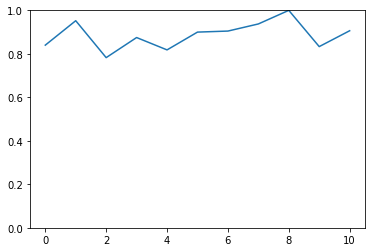

In [107]:
probs = df_suggested_words["in.cs"]
axes = plt.gca()
plt.plot(range(len(probs)), probs)
axes.set_ylim([0, 1])

# Is this close enough?
# Do we want to gather more data?
# Do we want to include more possible words which Adam didn't include?
# Other than the frequency with which people have these words come to mind,
## is there some other way we want to balance them?
## I roughly tried to balance their first letters and sounds as well as subject
### but perhaps we should formalize this?

In [108]:
# Create a second list, this one going B-Z
letters_list = alphabet_list[:][::-2]

In [109]:
letters_list

['Z', 'X', 'V', 'T', 'R', 'P', 'N', 'L', 'J', 'H', 'F', 'D', 'B']

In [110]:
measured_options = df[df[f"{letter_index}-letter"].isin(letters_list)].sort_values(f"{letter_index}-order")
measured_options

,word,in.cs,3-letter,3-order
21,BABOON,0.896552,B,2
22,CABINET,0.900000,B,2
0,ABDOMEN,0.886364,D,4
1,ADDICT,0.785714,D,4
2,BUDGET,0.833333,D,4
3,KIDNEY,0.846154,D,4
81,COFFEE,0.956522,F,6
82,COFFIN,0.875000,F,6
83,MUFFIN,0.904762,F,6
84,WAFFLE,0.800000,F,6


In [111]:
# Missing for letter index 3
# 8 - H
# 10 - J
# 24 - X
# 26 - Z

In [149]:
missing = "T"
all_words = all_words.assign(letter=all_words["word"].str.get(letter_index-1).str.upper())
possible_words = all_words[(all_words["letter"]==missing)&(~all_words["word"].str.get(0).str.isupper())]

In [151]:
chunk_size = 25
chunk = 0
possible_words.iloc[chunk*chunk_size:(chunk+1)*chunk_size]

,word,letter
15,although,T
19,attribute,T
52,fit,T
62,extrapolate,T
86,withy,T
102,afterlife,T
131,kit,T
150,intervene,T
156,introduction,T
174,cottonmouth,T


In [122]:
# options for H
## exhibition, school, vehicle, echo, atheism, schedule, 

In [128]:
# options for J
## adjective, injury, object, injustice, majesty, 

In [136]:
# options for X
## maximum, foxhole, text, tuxedo, pixel, anxiety, sixteen, saxophone, taxi, mixture

In [143]:
# options for Z
## puzzle, muzzle, lizard, hazelnut, buzzard, wizard, mozzarella, gazelle, pizza, 

In [144]:
measured_options

,word,in.cs,3-letter,3-order
21,BABOON,0.896552,B,2
22,CABINET,0.900000,B,2
0,ABDOMEN,0.886364,D,4
1,ADDICT,0.785714,D,4
2,BUDGET,0.833333,D,4
3,KIDNEY,0.846154,D,4
81,COFFEE,0.956522,F,6
82,COFFIN,0.875000,F,6
83,MUFFIN,0.904762,F,6
84,WAFFLE,0.800000,F,6


In [152]:
suggested_words_dict = {"Z": "WIZARD",
                   "X": "ANXIETY",
                   "V": "JAVELIN",
                   "T": "AUTUMN", # taking this instead of BATTERY, which had very bad recall (probably fluke?)
                   "R": "FIREFLY",
                   "P": "BAPTISM",
                   "N": "CANVAS",
                   "L": "SILVER",
                   "J": "INJURY",
                   "H": "SCHOOL",
                   "F": "COFFEE",
                   "D": "KIDNEY",
                   "B": "CABINET"
                  }
suggested_words = pd.DataFrame({"letter": list(suggested_words_dict.keys()), "word": list(suggested_words_dict.values())})
suggested_words

,letter,word
0,Z,WIZARD
1,X,ANXIETY
2,V,JAVELIN
3,T,AUTUMN
4,R,FIREFLY
5,P,BAPTISM
6,N,CANVAS
7,L,SILVER
8,J,INJURY
9,H,SCHOOL


In [153]:
df_suggested_words = df[df["word"].isin(suggested_words["word"])]
df_suggested_words

,word,in.cs,3-letter,3-order
3,KIDNEY,0.846154,D,4
22,CABINET,0.900000,B,2
35,SILVER,1.000000,L,12
40,CANVAS,0.935484,N,14
47,BAPTISM,0.888889,P,16
51,FIREFLY,0.950000,R,18
81,COFFEE,0.956522,F,6
85,JAVELIN,0.875000,V,22


(0.0, 1.0)

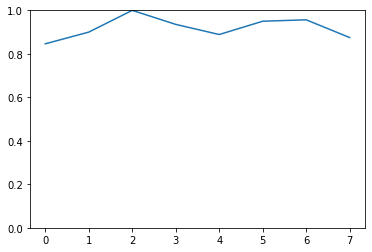

In [154]:
probs = df_suggested_words["in.cs"]
axes = plt.gca()
plt.plot(range(len(probs)), probs)
axes.set_ylim([0, 1])